In [7]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORT SCIKIT-LEARN (ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [8]:
# LOAD REQUIRED DATASETS (CSV FILES)
train_df = pd.read_csv(r"C:/Users/santosh/Desktop/AI/Datasets/Training.csv")
med_df = pd.read_csv(r"C:/Users/santosh/Desktop/AI/Datasets/medications.csv")
prec_df = pd.read_csv(r"C:/Users/santosh/Desktop/AI/Datasets/precautions.csv")

# DISPLAY FEW ROWS
print("Training dataset:")
display(train_df.head())

print("Medications dataset:")
display(med_df.head())

print("Precautions dataset:")
display(prec_df.head())


Training dataset:


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Medications dataset:


,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


Precautions dataset:


,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


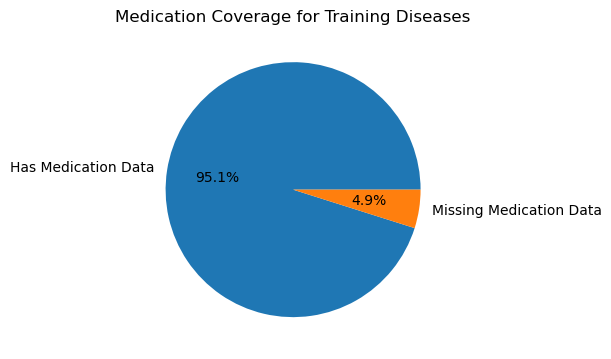

In [9]:
# MEDICATTION COVERAGE PIE COVERAGE
# This pie chart checks whether every disease in training has medication information available.
# Auto-detect trainig dataset
targets = ["disease", "Disease", "prognosis", "Prognosis"]
target_col = next((c for c in targets if c in train_df.columns), None)
if target_col is None:
    raise ValueError("Could not find target column in train_df for coverage charts.")

train_diseases = set(train_df[target_col].astype(str).str.strip().str.lower())

med_disease_col = "Disease" if "Disease" in med_df.columns else "disease"
med_diseases = set(med_df[med_disease_col].astype(str).str.strip().str.lower())

# Coverage counts:
with_med = len(train_diseases.intersection(med_diseases))
without_med = len(train_diseases) - with_med

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie([with_med, without_med], labels=["Has Medication Data", "Missing Medication Data"], autopct="%1.1f%%")
plt.title("Medication Coverage for Training Diseases")
plt.tight_layout()
plt.show()


In [10]:
# BAIC DATA CLEANING + PREPROCESSING
train_df = train_df.drop_duplicates()
train_df = train_df.fillna(0)

# Clean column names
train_df.columns = train_df.columns.str.strip().str.replace(" ", "_")

# Separate features and target
# X = symptom columns (inputs)
# y = disease column (output/label)
X = train_df.drop("disease", axis=1)
y = train_df["disease"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Display dataset shapes
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Number of diseases:", len(le.classes_))


Train shape: (243, 132)  Test shape: (61, 132)
Number of diseases: 41


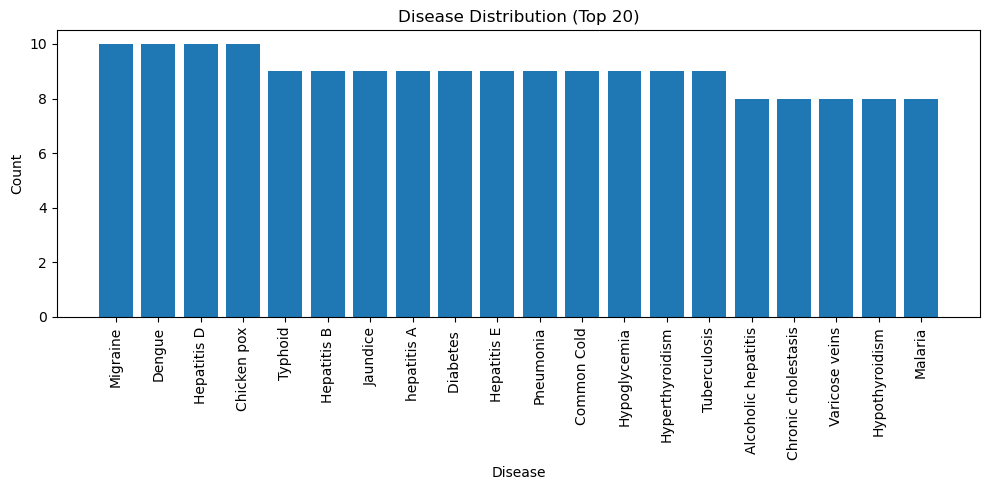

In [27]:
#  Disease Class Distribution (Top 20)
disease_counts = train_df["disease"].astype(str).value_counts()

# Plotting only top 20 diseases to keep the chart readable
top_n = 20
top_counts = disease_counts.head(top_n)

#ploting a bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_counts.index, top_counts.values)
plt.title(f"Disease Distribution (Top {top_n})")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


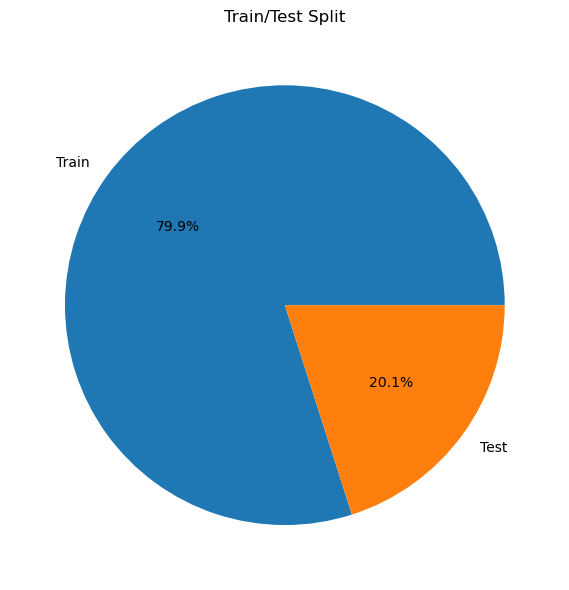

In [11]:
# Train/Test Split Pie Chart
train_size = len(y_train)
test_size = len(y_test)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie([train_size, test_size], labels=["Train", "Test"], autopct="%1.1f%%")
plt.title("Train/Test Split")
plt.tight_layout()
plt.show()


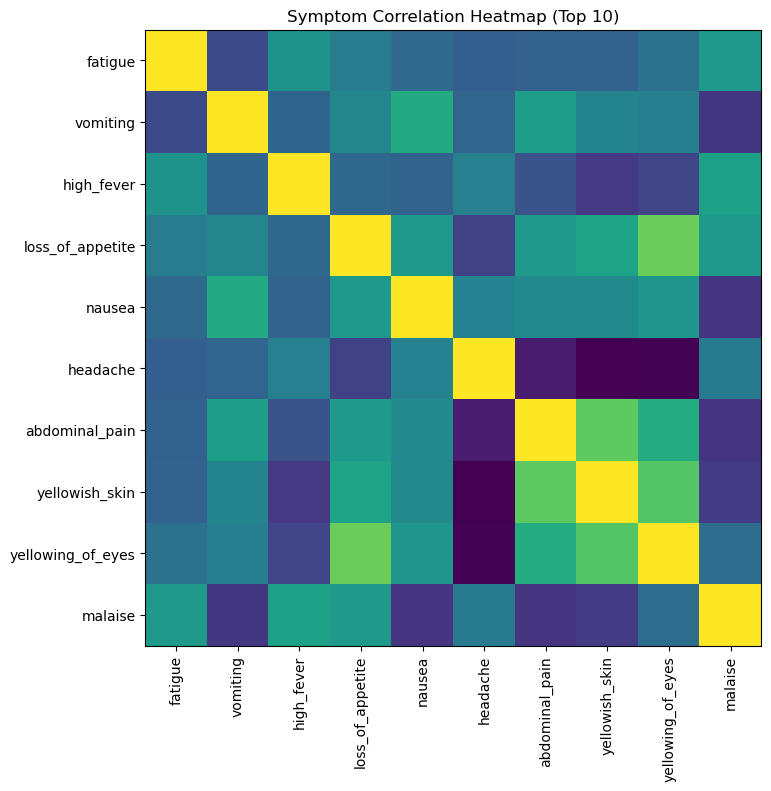

In [13]:
# Top 10 symptoms by frequency

symptom_freq = X.sum().sort_values(ascending=False)
top_symptoms = symptom_freq.head(10).index.tolist()

corr = X[top_symptoms].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation="nearest")
plt.title(f"Symptom Correlation Heatmap (Top {10})")
plt.xticks(range(10), top_symptoms, rotation=90)
plt.yticks(range(10), top_symptoms)
plt.show()


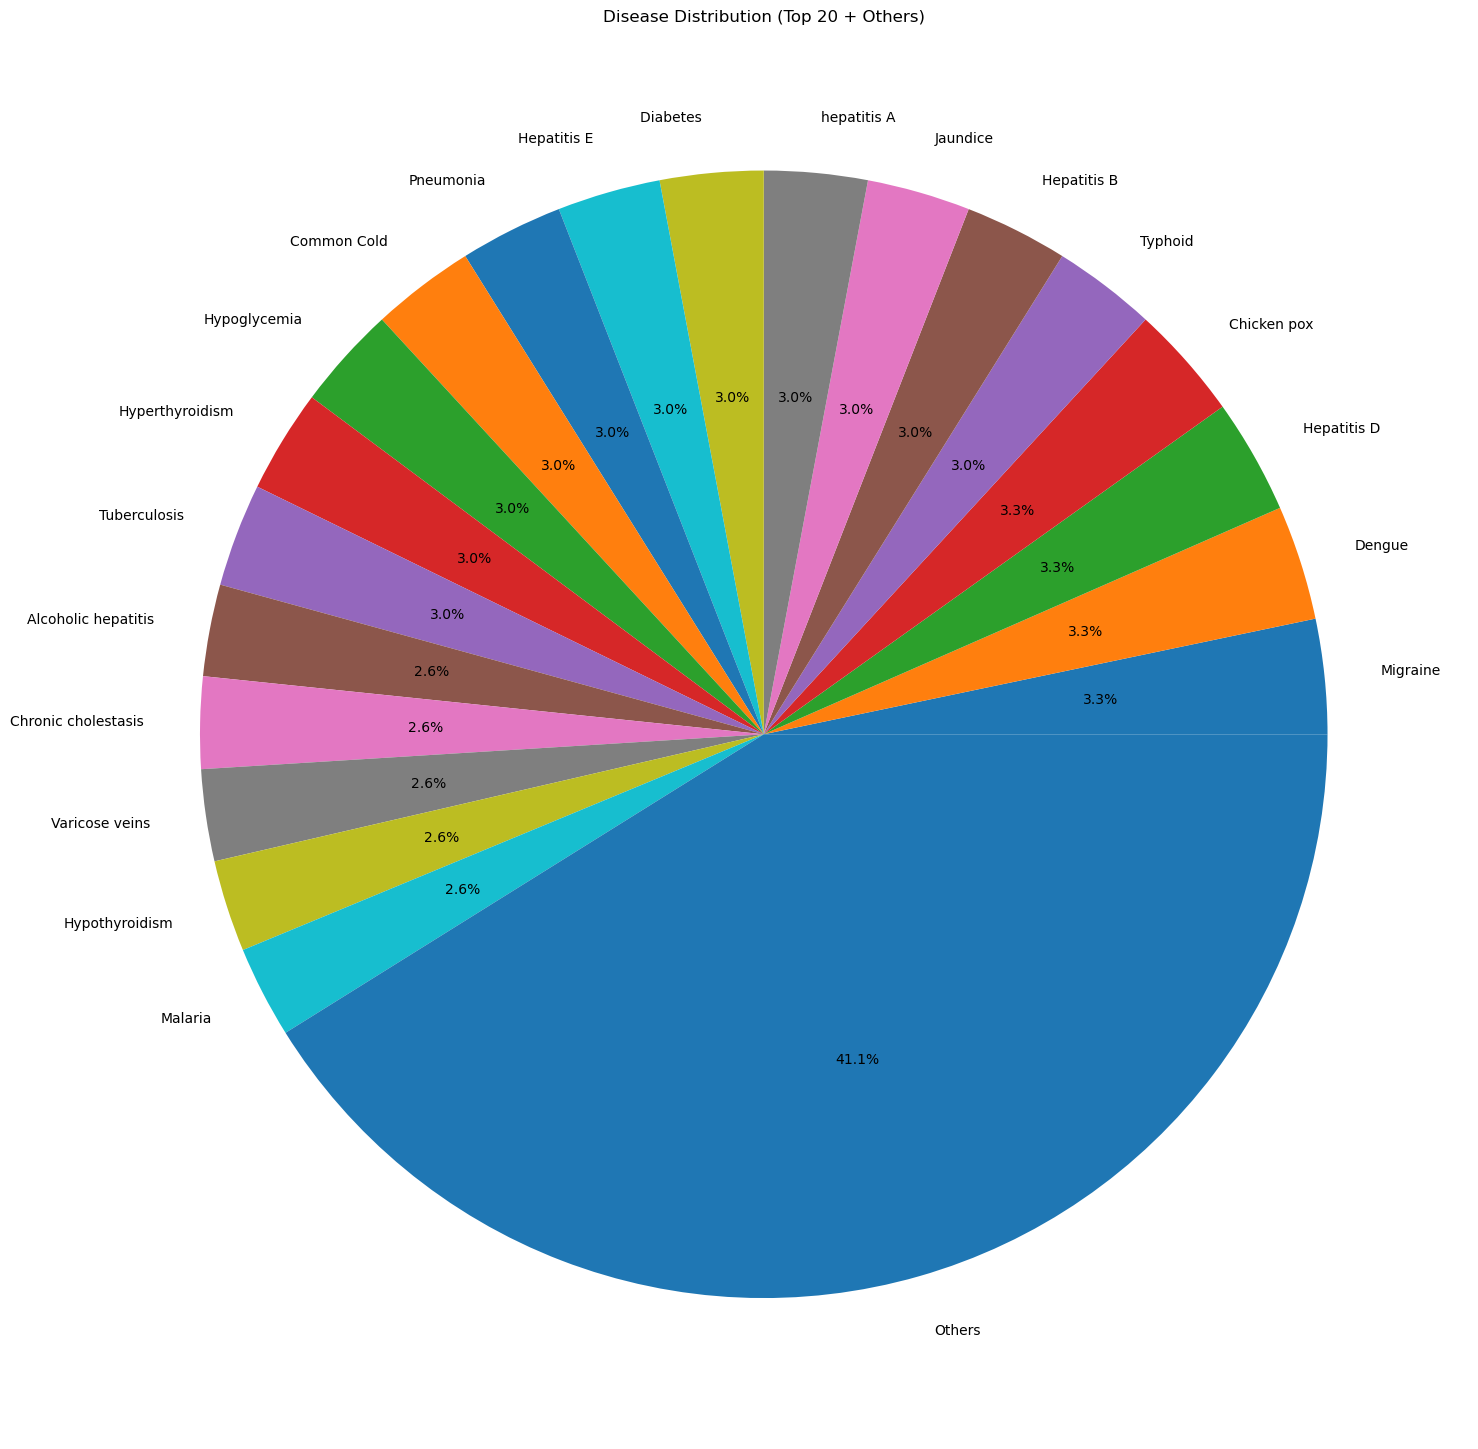

In [28]:
# Disease Distribution Pie Chart (Top 20 + Others)
# Count disease occurrences
counts = train_df[target_col].astype(str).value_counts()
top_k = 20
top_counts = counts.head(top_k)
others = counts.iloc[top_k:].sum()

# Preparing labels and values for pie chart
labels = list(top_counts.index) + ["Others"]
values = list(top_counts.values) + [others]

# Plot pie chart
plt.figure(figsize=(15, 15))
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title(f"Disease Distribution (Top {top_k} + Others)")
plt.tight_layout()
plt.show()


In [16]:
# MODEL TRAINING: Decision Tree
#Creating the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)# Predict diseases for the test data
dt_acc = accuracy_score(y_test, dt_preds)# Calculate accuracy

print("Decision Tree Accuracy:", round(dt_acc, 4))


Decision Tree Accuracy: 0.7049


In [17]:
# MODEL TRAINING: Random Forest
# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)# Train the model

rf_preds = rf_model.predict(X_test)# Predict diseases for the test data
rf_acc = accuracy_score(y_test, rf_preds)# Calculate accuracy

print("Random Forest Accuracy:", round(rf_acc, 4))

Random Forest Accuracy: 1.0


In [18]:
# MODEL TRAINING: Naive Bayes
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train, y_train)

# Predict diseases for the test data
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)# Calculate accuracy

print("Naive Bayes Accuracy:", round(nb_acc, 4))

Naive Bayes Accuracy: 0.9672


,Model,Accuracy
1,Random Forest,1.000000
2,Naive Bayes,0.967213
0,Decision Tree,0.704918


Best model: Random Forest


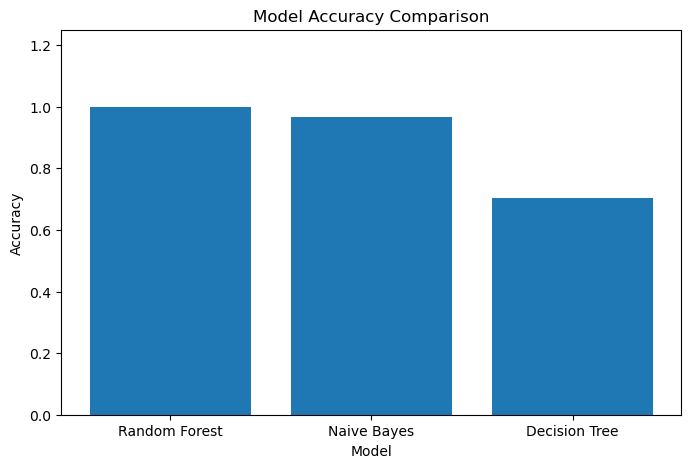

In [19]:
# MODEL COMPARISON
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Naive Bayes"],
    "Accuracy": [dt_acc, rf_acc, nb_acc]
}).sort_values(by="Accuracy", ascending=False)

# Display results table
display(results)

# Finding the best model name
best_model_name = results.iloc[0]["Model"]
print("Best model:", best_model_name)

#plotting a bar graph
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1.25)  
plt.xticks(rotation=0)
plt.show()


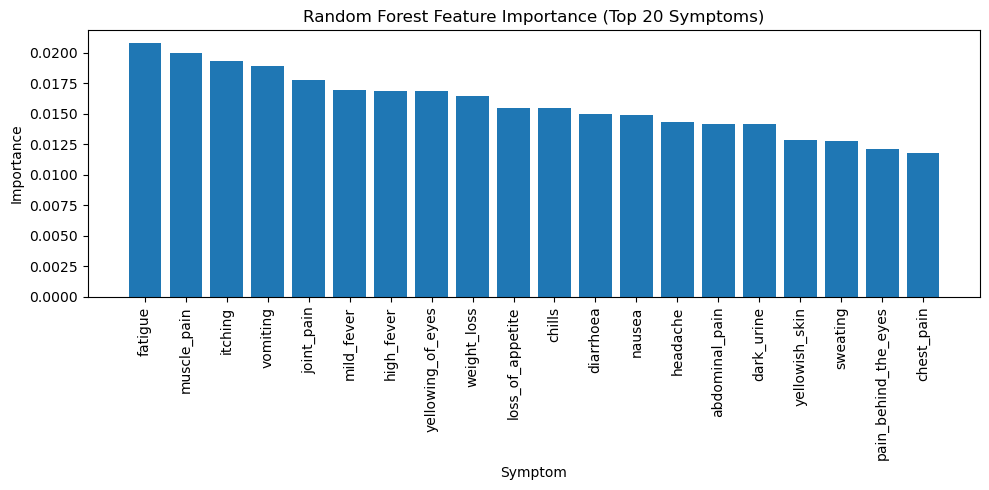

In [20]:
# To show which symptoms are most important for Random Forest predictions.

importances = rf_model.feature_importances_
feat_names = np.array(X.columns)# Get the corresponding symptom names

# Select top 20 most important symptoms
top_n = 20
idx = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 5))
plt.bar(feat_names[idx], importances[idx])
plt.title(f"Random Forest Feature Importance (Top {top_n} Symptoms)")
plt.xlabel("Symptom")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [21]:
# MODEL EVALUATION: Classification Report
## Printing detailed performance metrics (precision, recall, f1-score) for each disease class.

best_model = rf_model
# Predict on test dataset
best_preds = best_model.predict(X_test)

# Printing classification report:
print("Classification Report:\n")
print(classification_report(y_test, best_preds, target_names=le.classes_))


Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.00         2
   

In [31]:
# USER INPUT PORTAL
# Showing list of all symptom names
symptoms = list(X.columns) 
print("Example symptoms from dataset:")
print(symptoms[:20]) # show first 20 examples 

# Taking symptoms input from user separated by comma
user_input = input("\nEnter symptoms(e.g., itching, vomiting, high_fever): ").lower().strip() 

# Converting user input into a list of symptom names
user_symptoms = [s.strip().replace(" ", "_") for s in user_input.split(",")]


Example symptoms from dataset:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting__urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss']



Enter symptoms(e.g., itching, vomiting, high_fever):  anxiety, fatigue


In [32]:
#PROCESSING USER INPUTS 

user_data = np.zeros(len(symptoms))

# Mark 1 for symptoms entered by user
for symptom in user_symptoms:
    if symptom in symptoms:
        idx = symptoms.index(symptom)
        user_data[idx] = 1
    else:
        print(f" Warning: '{symptom}' not found in training symptoms")

# Scale user input using the same scaler
user_data_scaled = scaler.transform([user_data])


C:\Users\santosh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
# PREDICTION + RECOMMENDATION

# Predict the disease with Random Forest
pred_encoded = rf_model.predict(user_data_scaled)[0]
predicted_disease = le.inverse_transform([pred_encoded])[0]

# Disclaimer
print("\nNOTE: This may not be 100% correct diagnosis. Consult a medical professional As soon as possible.")
print(f"\nPredicted Disease: {predicted_disease}")

#  Medication recommendation
meds = med_df[med_df["Disease"].str.lower() == predicted_disease.lower()]["Medication"].values

#Precaution recommendation
precautions = prec_df[prec_df["Disease"].str.lower() == predicted_disease.lower()]

# Printing recommended medications
print("\nRecommended Medications:")
if len(meds) > 0:
    for m in meds:
        print("-", m)
else:
    print("No medication data found for this disease.")

# Printing precautions
print("\nPrecautions:")
if not precautions.empty:
    for i in range(1, 5):
        col = f"Precaution_{i}"
        if col in precautions.columns:
            val = precautions.iloc[0][col]
            if isinstance(val, str) and val.strip():
                print("-", val)
else:
    print("No precaution data found for this disease.")


NOTE: This may not be 100% correct diagnosis. Consult a medical professional As soon as possible.

Predicted Disease: Hypoglycemia

Recommended Medications:
- ['Pain relievers', 'Exercise', 'Hot and cold packs', 'Joint protection', 'Physical therapy']

Precautions:
- lie down on side
- check in pulse
- drink sugary drinks
- consult doctor


Top-3 predictions:
- Hepatitis C: 0.1050
- Bronchial Asthma: 0.1050
- Hypothyroidism: 0.0950


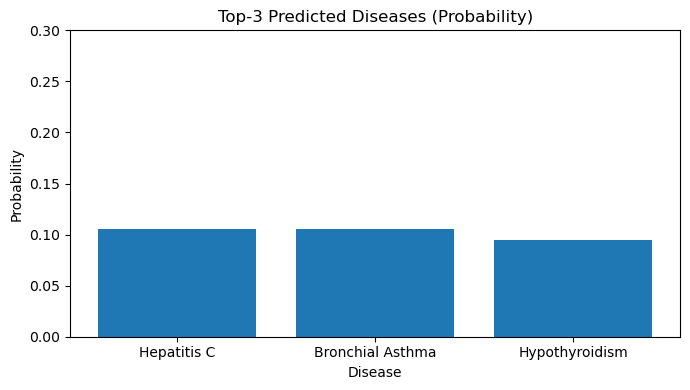

In [30]:
#Top-3 Disease Probabilities
#To show the top 3 predicted diseases and their probabilities for the user's symptom input.

# Choosing which model to use for probability plot
model_map = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model
}
proba_model = model_map.get(best_model_name, rf_model) 

# Checking if the chosen model supports probability prediction
if not hasattr(proba_model, "predict_proba"):
    print("This model does not support predict_proba(). Use Random Forest or Naive Bayes.")
else:
    probs = proba_model.predict_proba(user_data_scaled)[0]

    # Find the top 3 predicted class indices
    top3_idx = np.argsort(probs)[::-1][:3]

    top3_probs = probs[top3_idx]
    top3_labels = le.inverse_transform(top3_idx)

    # Print top 3 predictions
    print("Top-3 predictions:")
    for d, p in zip(top3_labels, top3_probs):
        print(f"- {d}: {p:.4f}")

    # Plotting top 3 probability bar chart
    plt.figure(figsize=(7, 4))
    plt.bar(top3_labels, top3_probs)
    plt.title("Top-3 Predicted Diseases (Probability)")
    plt.xlabel("Disease")
    plt.ylabel("Probability")
    plt.ylim(0, 0.3)
    plt.tight_layout()
    plt.show()